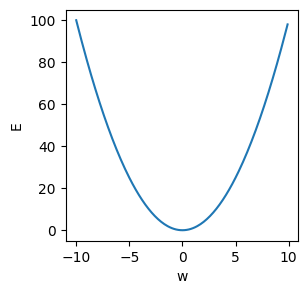

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def numerical_diff(f, w):
    dw = 0.0001
    return (f(w+dw) - f(w)) / dw

def loss_function(w):
    return w**2

w = np.arange(-10.0, 10.0, 0.1)
y = loss_function(w)

plt.figure(figsize=(3,3))
plt.xlabel("w")
plt.ylabel("E")
plt.plot(w, y)
plt.show()

In [2]:
w_50 = numerical_diff(loss_function, 5.0)
w_25 = numerical_diff(loss_function, 2.5)
print(format(w_50, ".3f"))
print(format(w_25, ".3f"))

10.000
5.000


In [3]:
w_50 = numerical_diff(loss_function, -5.0)
w_25 = numerical_diff(loss_function, -2.5)
print(format(w_50, ".3f"))
print(format(w_25, ".3f"))

-10.000
-5.000


In [4]:
def numerical_diff(function, x):
    h = 0.0001
    return (function(x+h) - function(x)) / h

c:\projects\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


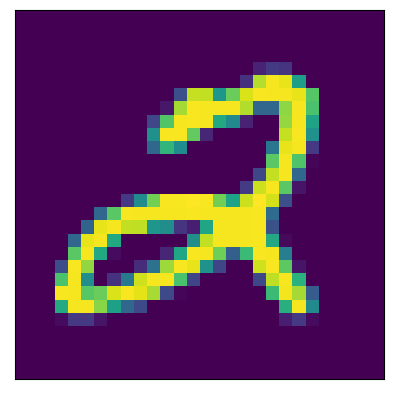

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

data = tfds.load('mnist', split='test', as_supervised=True)
tmp,_=next(iter(data.take(1)))

np.array(tmp).reshape(28,28)
plt.imshow(np.array(tmp).reshape(28,28))
plt.xticks([])
plt.yticks([])
plt.show()

10000
10000


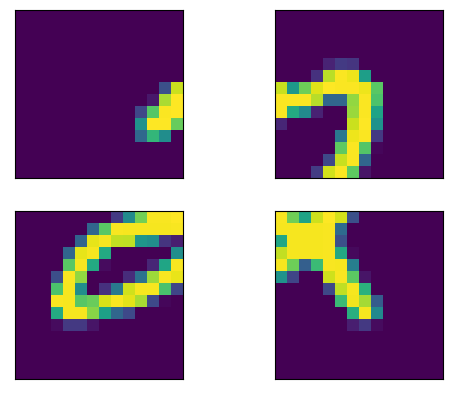

In [6]:
data = tfds.load('mnist', split='test', as_supervised=True)
print(len(data))
get_patches = lambda x, y: (tf.reshape(
    tf.image.extract_patches(
        images=tf.expand_dims(x, 0),
        sizes=[1, 14, 14, 1],
        strides=[1, 14, 14, 1],
        rates=[1, 1, 1, 1],
        padding='VALID'), (4, 14, 14, 1)), y)

data = data.map(get_patches)
print(len(data))

fig = plt.figure()
plt.subplots_adjust(wspace=.1, hspace=.2)
images, labels = next(iter(data))
for index, image in enumerate(images):
    ax = plt.subplot(2, 2, index + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image)
plt.show()

In [7]:
len(data)

10000

In [8]:
print("sfsd")

sfsd


In [9]:
import tensorflow as tf

class TileDatasetGenerator:
    def __init__(self, dataset, batch_size, tile_shape):
        self.dataset_iterator = iter(dataset)
        self.batch_size = batch_size
        self.tile_shape = tile_shape
        self.image_queue = None
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self._has_queued_enough_for_batch():
            return self._dequeue_batch()
        
        batch = next(self.dataset_iterator)
        self._split_images(batch)    
        return self.__next__()
            
    def _has_queued_enough_for_batch(self):
        return self.image_queue is not None and tf.shape(self.image_queue)[0] >= self.batch_size
    
    def _dequeue_batch(self):
        batch, remainder = tf.split(self.image_queue, [self.batch_size, -1], axis=0)
        self.image_queue = remainder
        return batch
        
    def _split_images(self, batch):
        batch_shape = tf.shape(batch)
        batch_splitted = tf.reshape(batch, shape=[-1, self.tile_shape[0], self.tile_shape[1], batch_shape[-1]])
        if self.image_queue is None:
            self.image_queue = batch_splitted
        else:
            self.image_queue = tf.concat([self.image_queue, batch_splitted], axis=0)
            


dataset = tf.data.Dataset.from_tensor_slices(tf.ones(shape=[128, 64, 64, 3]))
dataset.batch(32)
generator = TileDatasetGenerator(dataset, batch_size = 16, tile_shape = [32,32])

for batch in generator:
    tf.print(tf.shape(batch))

[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]
[16 32 32 3]


In [10]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        return self.x * self.y

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy


In [11]:
price_apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

price_apple_num = mul_apple_layer.forward(price_apple, apple_num)
price_apple_tax = mul_tax_layer.forward(price_apple_num, tax)

print(f"최종 지불 금액: {round(price_apple_tax,3)}")


최종 지불 금액: 220.0


In [12]:
dprice = 1
dprice_apple_num, dtax = mul_tax_layer.backward(dprice)
dprice_apple, dapple_num = mul_apple_layer.backward(dprice_apple_num)

print("소비세에 대한 지불 금액의 미분:", dtax)
print("사과 가격에 대한 지불 금액의 미분:", dprice_apple)
print("사과 개수에 대한 지불 금액의 미분:", dapple_num)


소비세에 대한 지불 금액의 미분: 200
사과 가격에 대한 지불 금액의 미분: 2.2
사과 개수에 대한 지불 금액의 미분: 110.00000000000001


In [13]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        return x+y

    def backward(self, dout):
        dx = dout*1
        dy = dout*1
        return dx, dy


In [14]:
price_apple = 100
apple_num = 2
price_orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()


In [15]:
price_apple_num = mul_apple_layer.forward(price_apple, apple_num)
price_orange_num = mul_orange_layer.forward(price_orange, orange_num)
price_all_num = add_apple_orange_layer.forward(
    price_apple_num, price_orange_num)
price_all_tax = mul_tax_layer.forward(price_all_num, tax)
print(f"최종 지불 금액: {round(price_all_tax,3)}")


최종 지불 금액: 715.0


In [16]:
# back propagation
dprice = 1
dprice_all_num, dtax = mul_tax_layer.backward(dprice)
dprice_apple_num, dprice_orange_num = add_apple_orange_layer.backward(
    dprice_all_num)
dprice_orange, dorange_num = mul_orange_layer.backward(dprice_orange_num)
dprice_apple, dapple_num = mul_apple_layer.backward(dprice_apple_num)

print(f"소비세에 대한 지불 금액의 미분: {dtax}")
print(f"사과 가격에 대한 지불 금액의 미분: {dprice_apple}")
print(f"사과 개수에 대한 지불 금액의 미분: {dapple_num}")
print(f"오렌지 가격에 대한 지불 금액의 미분: {dprice_orange}")
print(f"오렌지 개수에 대한 지불 금액의 미분: {dorange_num}")


소비세에 대한 지불 금액의 미분: 650
사과 가격에 대한 지불 금액의 미분: 2.2
사과 개수에 대한 지불 금액의 미분: 110.00000000000001
오렌지 가격에 대한 지불 금액의 미분: 3.3000000000000003
오렌지 개수에 대한 지불 금액의 미분: 165.0
